# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Output File (CSV)
output_data_file = "output_data/cities_new.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

#city = 'London'
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="

In [4]:
# Get weather data

# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=4, sort_keys=True))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
City = []
Lat = []
Lng = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Country = []
Date =[]


# print("Beginning Data Retrieval")
# print("----------------------------")
# counter = 1
# set = 1
# for city in cities:
    
#     #try: 
#         weather_json = requests.get(query_url+city).json()

#         City.append(weather_response["name"])
#         Lat.append(weather_response["coord"]["lat"])
#         Lng.append(weather_response["coord"]["lon"])
#         MaxTemp.append(weather_response["main"]["temp_max"])
#         Humidity.append(weather_response["main"]["humidity"])
#         Cloudiness.append(weather_response["clouds"]['all'])
#         WindSpeed.append(weather_response["wind"]["speed"])
#         Country.append(weather_response["sys"]["country"])
#         Date.append(weather_response["dt"])
# #         print(f'Processing Record {counter} of Set {set} | {city}')
# #         counter = counter + 1
# #         if (counter == 50):
# #             counter = 0
# #             set = set+1
# #     except:
# #         print("Did not find the city...go to the next!!")
# #         continue  
# # print ("-----------------------------")
# # print("Data Retrieval Complete")      
# # print("-----------------------------")   

for city in cities:
    
    try:
    
        weather_json = requests.get(query_url+city).json()
           
        City.append(weather_json["name"])
        Lat.append(weather_json["coord"]["lat"])
        Lng.append(weather_json["coord"]["lon"])
        MaxTemp.append(weather_json["main"]["temp_max"])
        Humidity.append(weather_json["main"]["humidity"])
        Cloudiness.append(weather_json["clouds"]['all'])
        WindSpeed.append(weather_json["wind"]["speed"])
        Country.append(weather_json["sys"]["country"])
        Date.append(weather_json["dt"])
        
    except:
        print("Did not find the city...go to the next!!")
        continue 
        
     

Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Did not find the

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
main_df = pd.DataFrame({
    "City":City, 'Lat':Lat, 'Lng':Lng, 'Max Temp':MaxTemp,'Humidity':Humidity, 
    'Cloudiness':Cloudiness, 'Wind Speed':WindSpeed, 'Country':Country, 'Date':Date
    })
main_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,293.44,91,100,6.18,PF,1605805427
1,Hermanus,-34.42,19.23,293.15,61,0,2.68,ZA,1605805424
2,Touros,-5.20,-35.46,303.15,66,40,6.70,BR,1605805435
3,Marrakesh,31.63,-8.01,300.15,21,40,3.10,MA,1605805504
4,Ushuaia,-54.80,-68.30,285.15,62,75,8.70,AR,1605805195
...,...,...,...,...,...,...,...,...,...
550,Tarnogskiy Gorodok,60.50,43.58,278.67,82,100,7.42,RU,1605805637
551,Opuwo,-18.06,13.84,302.89,20,59,5.45,NA,1605805637
552,Kharp,66.80,65.81,262.60,93,61,2.26,RU,1605805637
553,Japura,-0.32,102.35,296.53,98,98,1.31,ID,1605805638


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
main_df['Humidity'].describe()
humidity_more100 = main_df.loc[main_df["Humidity"] >100].index
humidity_more100

#main_df['Humidity'].describe()

Int64Index([], dtype='int64')

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_more100_opt2 = main_df[main_df["Humidity"] >100].index
humidity_more100_opt2
# base on the my code above.. there is no city with humidity greater than 100

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
clean_humidity = main_df.drop(humidity_more100, inplace = False)

clean_humidity["Humidity"].describe()

clean_humidity.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,293.44,91,100,6.18,PF,1605805427
1,Hermanus,-34.42,19.23,293.15,61,0,2.68,ZA,1605805424
2,Touros,-5.20,-35.46,303.15,66,40,6.70,BR,1605805435
3,Marrakesh,31.63,-8.01,300.15,21,40,3.10,MA,1605805504
4,Ushuaia,-54.80,-68.30,285.15,62,75,8.70,AR,1605805195


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

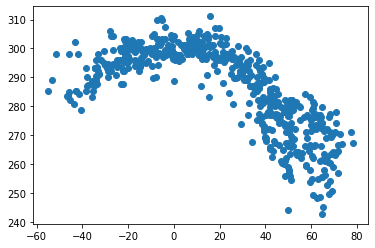

In [14]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Max Temp'])

## Latitude vs. Humidity Plot

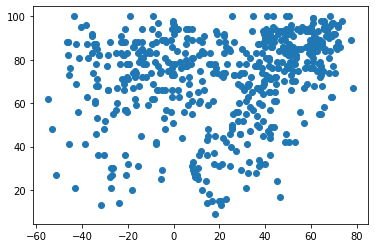

In [15]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Humidity'])

## Latitude vs. Cloudiness Plot

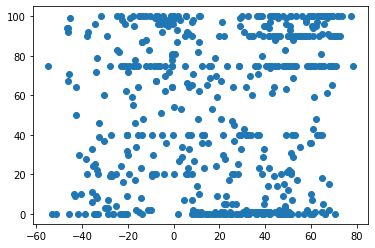

In [16]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Cloudiness'])

## Latitude vs. Wind Speed Plot

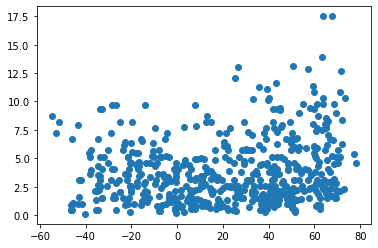

In [17]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Wind Speed'])

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8432519394640452


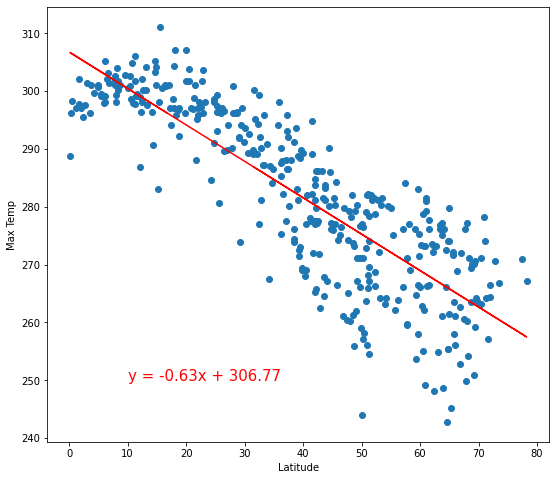

In [45]:
# Add the linear regression equation and line to plot
north_hemi = clean_humidity.loc[clean_humidity['Lat']>= 0]
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 250),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()


#north_hemi

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression